<a href="https://colab.research.google.com/github/jblanco89/MonteCarlo_Portfolio/blob/main/portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycoingecko 

In [2]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import time
import StocksData as sd


Tickers for Portfolio

In [3]:
stocks = ['storj', 'sand', 'ocean', 'lrc', 'chr', 'hot'] 

In [4]:
prices = sd.get_data(stocks, '10/08/21', '11/01/21')
prices.head()

,Timestamp,storj,sand,ocean,lrc,chr,hot
0,10/08/21 00:10,1.332271,0.802883,0.836445,0.392467,0.358890,0.009567
1,10/08/21 01:10,1.332302,0.796837,0.828966,0.391842,0.360345,0.009628
2,10/08/21 02:10,1.350090,0.781320,0.826888,0.396677,0.362299,0.009720
3,10/08/21 03:10,1.322027,0.788437,0.835452,0.401577,0.360663,0.009748
4,10/08/21 04:10,1.317030,0.785829,0.836425,0.403712,0.363798,0.009811


In [5]:
prices.tail()

,Timestamp,storj,sand,ocean,lrc,chr,hot
566,10/31/21 14:10,2.526776,1.534825,0.849551,0.555271,0.435858,0.013829
567,10/31/21 15:10,2.553225,1.575114,0.867820,0.558837,0.434788,0.013229
568,10/31/21 16:10,2.203670,1.557898,0.873011,0.553778,0.433332,0.013640
569,10/31/21 17:10,2.373226,1.511914,0.871200,0.551872,0.440554,0.013815
570,10/31/21 18:10,2.322909,1.502512,0.859772,0.557211,0.442474,0.013930


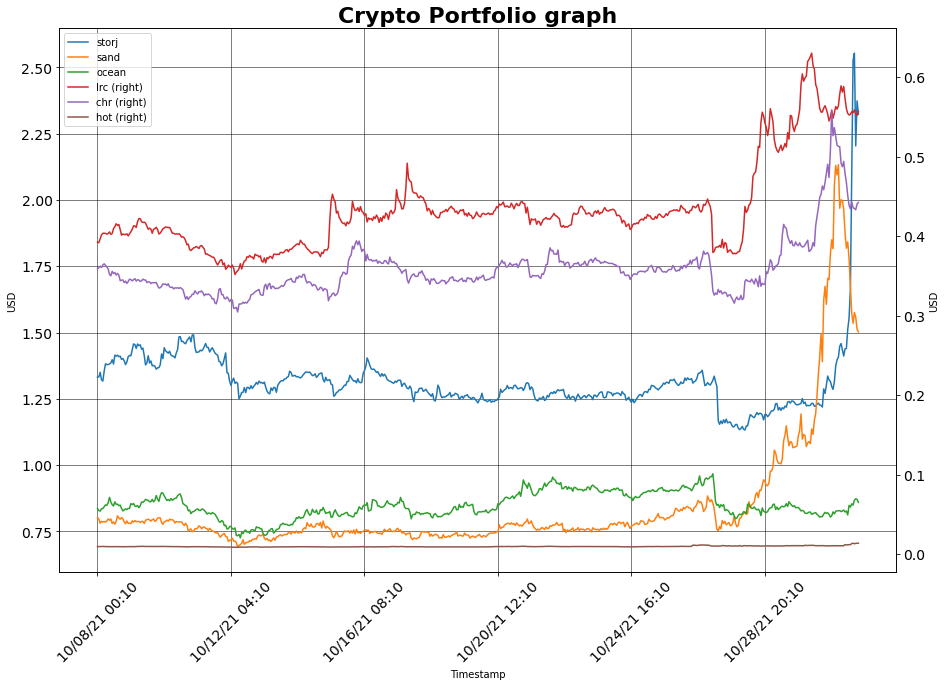

In [6]:
sd.plot_stock_data(prices)

In [7]:
#Calculating daily return 
def daily_returns(df):
    return (df.pct_change())

daily_rets = daily_returns(prices.drop('Timestamp', axis=1))

print(daily_rets.tail())



        storj      sand     ocean       lrc       chr       hot
566  0.196036 -0.023891 -0.005293 -0.002262 -0.016333  0.031524
567  0.010468  0.026250  0.021503  0.006422 -0.002455 -0.043371
568 -0.136908 -0.010930  0.005982 -0.009052 -0.003349  0.031098
569  0.076943 -0.029517 -0.002075 -0.003443  0.016665  0.012777
570 -0.021202 -0.006218 -0.013117  0.009675  0.004358  0.008332


In [8]:
#Setting function for calculting daily return for every selected coin

def mean_return(daily_returns):
    return (daily_returns.mean())

mean_return_rets = mean_return(daily_rets)
print(mean_return_rets.tail())


sand     0.001271
ocean    0.000110
lrc      0.000717
chr      0.000469
hot      0.000770
dtype: float64


In [9]:
#creating covariance matrices

def covariance_matrix(daily_returns):
    return (daily_returns.cov())

cov_matrix_all = covariance_matrix(daily_rets)
print(cov_matrix_all)

              storj      sand     ocean           lrc       chr       hot
storj  3.742031e-04 -0.000031  0.000002 -1.790972e-07 -0.000006  0.000060
sand  -3.141611e-05  0.000349  0.000006  1.312318e-05  0.000037 -0.000023
ocean  1.783864e-06  0.000006  0.000123 -2.155892e-05 -0.000008  0.000007
lrc   -1.790972e-07  0.000013 -0.000022  2.051355e-04  0.000026  0.000001
chr   -5.598923e-06  0.000037 -0.000008  2.571938e-05  0.000205 -0.000008
hot    5.994759e-05 -0.000023  0.000007  1.321518e-06 -0.000008  0.000231


In [10]:
# ------------------------------------------------------
# ------ MONTECARLO SIMULATION FUNCTION ----------------
# ------------------------------------------------------

#we must create a function to calculate returns, standard dev 
# and Sharpe ratios for speciefied randomly weighted portfolios

def results_dataframe(tickers, number_portfolios, mean_daily_returns, cov_matrix):
    results_temp = np.zeros((4 + len(tickers) - 1, number_portfolios))

    for i in range(number_portfolios):
        # select random weights for portfolio holdings
        weights = np.array(np.random.random(len(tickers)))
        
        # rebalance weights to sum to 1
        weights /= np.sum(weights)

        # calculate portfolio return and volatility
        portfolio_return = np.sum(mean_daily_returns * weights) * 252
        portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

        # 3 month T-Bill yield used as risk free rate of return
        risk_free_return = 0.0139

        # store results in results array
        results_temp[0, i] = portfolio_return
        results_temp[1, i] = portfolio_std_dev
        
        # store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
        results_temp[2, i] = (results_temp[0, i] - risk_free_return) / results_temp[1, i]
        
        # iterate through the weight vector and add data to results array
        for j in range(len(weights)):
            results_temp[j + 3, i] = weights[j]

    # convert results array to Pandas DataFrame
    results_df = pd.DataFrame(results_temp.T, columns=['ret', 'stdev', 'sharpe', tickers[0], 
                                                       tickers[1], tickers[2],
                                                       tickers[3], tickers[4],
                                                       tickers[5]])
    
    return results_df



In [11]:
results_crypto = results_dataframe(stocks,50000, mean_return_rets, cov_matrix_all)
print(results_crypto.tail())

            ret     stdev    sharpe  ...       lrc       chr       hot
49995  0.179714  0.126892  1.306728  ...  0.066693  0.270640  0.219733
49996  0.166732  0.121618  1.256656  ...  0.210608  0.150923  0.054860
49997  0.197682  0.114958  1.598697  ...  0.242288  0.147695  0.031170
49998  0.196257  0.116307  1.567885  ...  0.088997  0.057972  0.289194
49999  0.188684  0.108568  1.609912  ...  0.185666  0.117475  0.205117

[5 rows x 9 columns]


In [12]:
#finding portfolio with the highest sharpe ratio

def max_sr(results_df):
    return results_df.iloc[results_df['sharpe'].idxmax()]

max_sharpe_portfolio = max_sr(results_crypto)
print(max_sharpe_portfolio)


ret       0.228660
stdev     0.123861
sharpe    1.733882
storj     0.206278
sand      0.259778
ocean     0.051505
lrc       0.208176
chr       0.087299
hot       0.186965
Name: 49501, dtype: float64


In [13]:
#identifiying portfolio with the lowest volatility (stdev)

def min_vol(result_df):
    return result_df.iloc[result_df['stdev'].idxmin()]


In [14]:
min_vol_portfolio = min_vol(result_df=results_crypto)
print(min_vol_portfolio)

ret       0.146237
stdev     0.097172
sharpe    1.361881
storj     0.069857
sand      0.106144
ocean     0.325116
lrc       0.215777
chr       0.144061
hot       0.139046
Name: 1592, dtype: float64


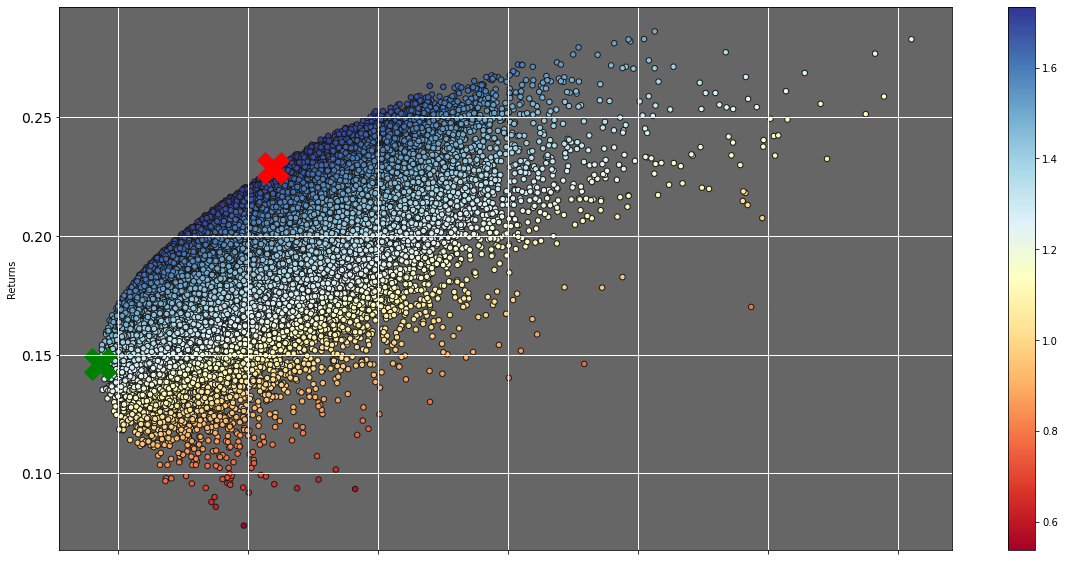

In [15]:
#Plot all different portfolio results with different weights

def plot_graph(results_df, max_sharpe_port, min_vol_port):
    ax = results_df.plot(kind= 'scatter', x = 'stdev', y='ret', s = 30, 
                         c=results_df.sharpe, cmap='RdYlBu',edgecolors='.1', figsize=(20,10))
    ax.grid(False, color='w', linestyle='-', linewidth=1)
    ax.set_facecolor('0.4')
    ax.set_xlabel('Volatility')
    ax.set_ylabel('Returns')
    ax.tick_params(labelsize = 14)

    # # plot red star to highlight position of portfolio with highest Sharpe Ratio
    ax.scatter(max_sharpe_port[1], max_sharpe_port[0], marker="X", color='r', s=1000)
    # # plot green star to highlight position of minimum variance portfolio
    ax.scatter(min_vol_port[1], min_vol_port[0], marker="X", color='g', s=1000)

plot_graph(results_crypto,max_sharpe_portfolio, min_vol_portfolio)
plt.show()

In [16]:
#Looking for real portfolio weight
real_portfolio = [0.05, 0.40, 0.10, 0.30, 0.5, 0.5]
type(real_portfolio)

list

In [17]:
rf = results_crypto.iloc[:,[3,4,5,6,7,8]]
rf

,storj,safemoon,vra,blok,lrc,chr
0,0.240937,0.030429,0.316950,0.053445,0.270762,0.087477
1,0.194728,0.143050,0.200905,0.156701,0.147235,0.157383
2,0.078952,0.122371,0.214532,0.071243,0.269441,0.243460
3,0.253108,0.245879,0.331049,0.103192,0.006453,0.060319
4,0.395804,0.067384,0.234204,0.077970,0.018986,0.205652
...,...,...,...,...,...,...
59995,0.168223,0.272693,0.086970,0.300064,0.116985,0.055064
59996,0.331380,0.010061,0.101942,0.149580,0.198683,0.208354
59997,0.202001,0.141244,0.223852,0.216279,0.161591,0.055033
59998,0.115970,0.125909,0.268694,0.176019,0.164582,0.148826


In [18]:
rf_round = np.round(rf,decimals=2)
rf_round

,storj,safemoon,vra,blok,lrc,chr
0,0.24,0.03,0.32,0.05,0.27,0.09
1,0.19,0.14,0.20,0.16,0.15,0.16
2,0.08,0.12,0.21,0.07,0.27,0.24
3,0.25,0.25,0.33,0.10,0.01,0.06
4,0.40,0.07,0.23,0.08,0.02,0.21
...,...,...,...,...,...,...
59995,0.17,0.27,0.09,0.30,0.12,0.06
59996,0.33,0.01,0.10,0.15,0.20,0.21
59997,0.20,0.14,0.22,0.22,0.16,0.06
59998,0.12,0.13,0.27,0.18,0.16,0.15


In [19]:
rf_round.isin(real_portfolio).any()

storj       True
safemoon    True
vra         True
blok        True
lrc         True
chr         True
dtype: bool

In [20]:

weights = real_portfolio
results_temp = np.zeros((4 + len(stocks) - 1, 1))    
# rebalance weights to sum to 1
weights /= np.sum(weights)

# calculate portfolio return and volatility
portfolio_return = np.sum(mean_return_rets * weights) * 252
portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_all, weights))) * np.sqrt(252)

# 3 month T-Bill yield used as risk free rate of return
risk_free_return = 0.0139

# store results in results array
results_temp[0, 0] = portfolio_return
results_temp[1, 0] = portfolio_std_dev
    
# store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
results_temp[2, 0] = (results_temp[0, 0] - risk_free_return) / results_temp[1, 0]
    
# iterate through the weight vector and add data to results array
for j in range(len(weights)):
  results_temp[j + 3, 0] = weights[j]

# convert results array to Pandas DataFrame
results_test_portfolio = pd.DataFrame(results_temp.T, columns=['ret', 'stdev', 'sharpe', stocks[0], 
                                                    stocks[1], stocks[2],
                                                    stocks[3], stocks[4],
                                                    stocks[5]])

results_test_portfolio


,ret,stdev,sharpe,storj,safemoon,vra,blok,lrc,chr
0,0.67347,0.182772,3.608698,0.027027,0.216216,0.054054,0.162162,0.27027,0.27027


In [21]:
def plot_graph_test(results_df, max_sharpe_port, min_vol_port, results_test):
    ax = results_df.plot(kind= 'scatter', x = 'stdev', y='ret', s = 40, 
                         c=results_df.sharpe, cmap='RdYlBu',edgecolors='.1', 
                         figsize=(20,10))
    ax.grid(False, color='w', linestyle='-', linewidth=1)
    ax.set_facecolor('0.4')
    ax.set_title("MonteCarlo simulation with real portfolio", fontsize=22, 
                 fontweight='bold')
    ax.set_xlabel('Volatility', fontsize = 14)
    ax.set_ylabel('Returns', fontsize = 14)
    ax.tick_params(labelsize = 14) 

    # # plot red star to highlight position of portfolio with highest Sharpe Ratio
    ax.scatter(max_sharpe_port[1], max_sharpe_port[0], marker="X", color='darkred', s=700)
    # # plot green star to highlight position of minimum variance portfolio
    ax.scatter(min_vol_port[1], min_vol_port[0], marker="X", color='b', s=700)

    rt = results_test.values

    ax.scatter(rt[0,1], rt[0,0], marker = "X", color = 'k', s=700)




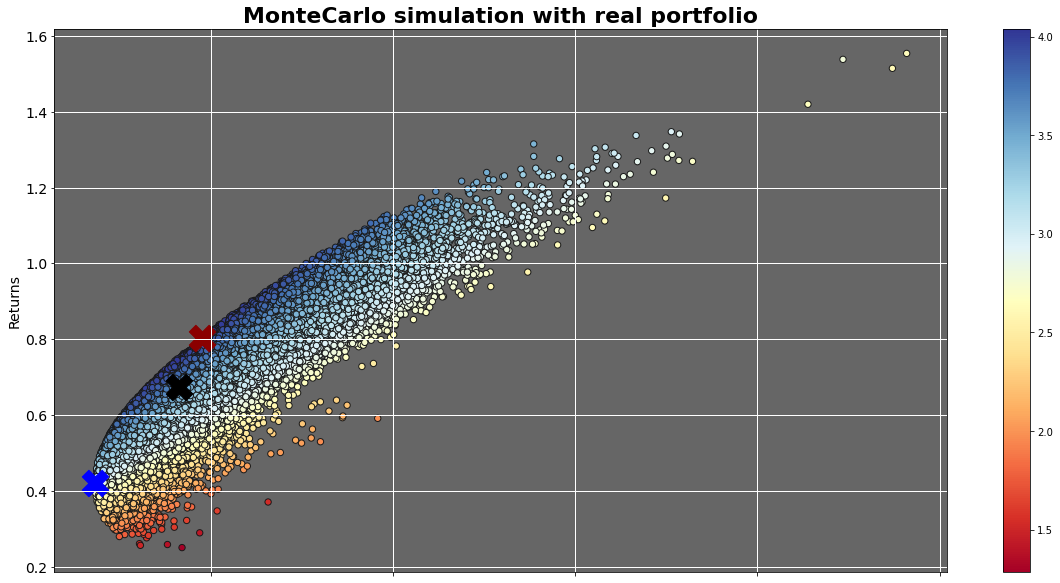

In [22]:
plot_graph_test(results_crypto, max_sharpe_portfolio, min_vol_portfolio, results_test_portfolio)
plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html /content/portfolio.ipynb


[NbConvertApp] Converting notebook /content/portfolio.ipynb to html
[NbConvertApp] Writing 1224186 bytes to /content/portfolio.html
